In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
img_paths = ["data/c02_s07.png", "data/c06_s01.png", "data/c15_s02.png",
            "data/c10_s07.png", "data/c10_s06.png", "data/c15_s06.png"]

In [4]:
imgs = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in img_paths]

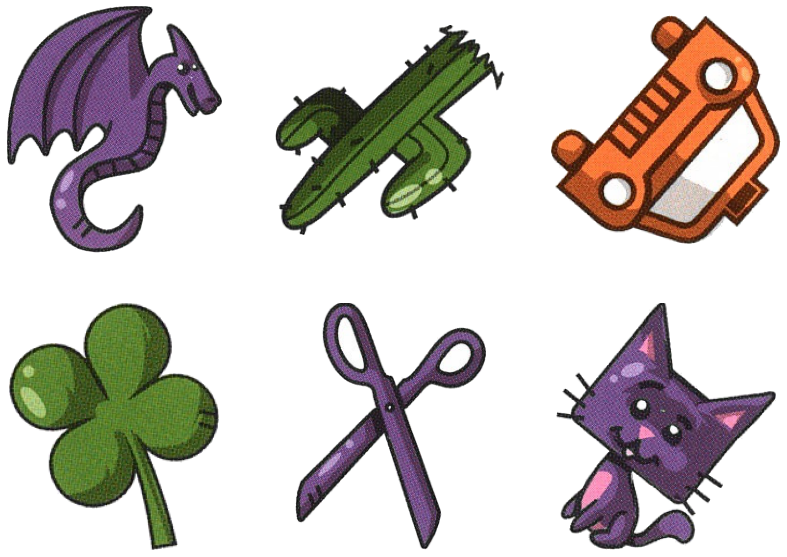

In [5]:
fig, ax_arr = plt.subplots(figsize=(14,10),nrows=2, ncols=3)

for img, ax in zip(imgs, np.nditer(ax_arr, flags=["refs_ok"])):
    ax.item().imshow(img)
    ax.item().set_axis_off()

In [6]:
imgs_gray = [cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in imgs]

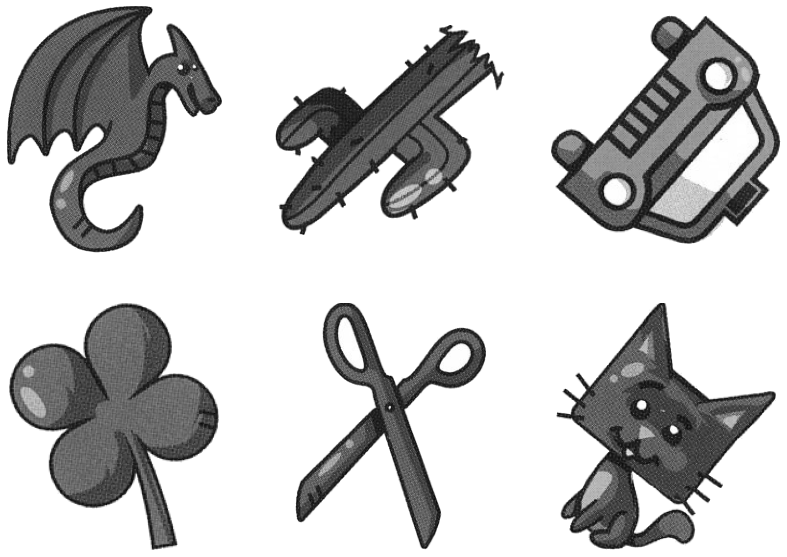

In [7]:
fig, ax_arr = plt.subplots(figsize=(14,10),nrows=2, ncols=3)

for img, ax in zip(imgs_gray, np.nditer(ax_arr, flags=["refs_ok"])):
    ax.item().imshow(img, cmap='gray')
    ax.item().set_axis_off()

In [73]:
ffts_gray = [np.fft.fftshift(np.fft.fft2(img_gray)) for img_gray in imgs_gray]

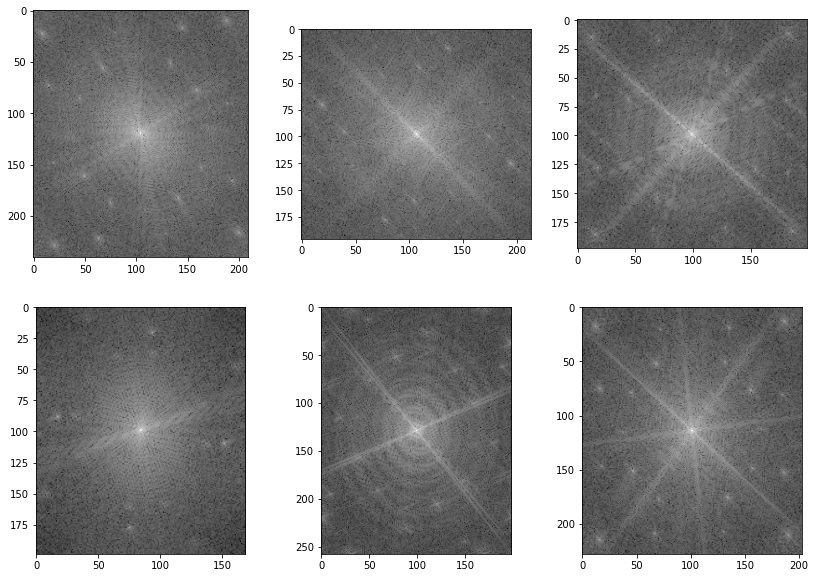

In [75]:
fig, ax_arr = plt.subplots(figsize=(14,10),nrows=2, ncols=3)

for fft, ax_ref in zip(ffts_gray, np.nditer(ax_arr, flags=["refs_ok"])):
    ax = ax_ref.item()
    ax.imshow(np.log(np.abs(fft)), cmap='gray')

In [28]:
fft_text = np.log10(np.abs(ffts_gray[4]))

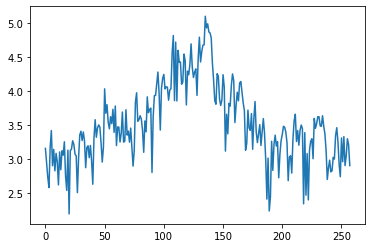

In [33]:
plt.plot(range(fft_text.shape[0]), fft_text[:,83])

In [63]:
fft_magn = np.abs(ffts_gray[2])

In [64]:
dst = cv2.cornerHarris(fft_magn.astype(np.float32),3,3,0.04)

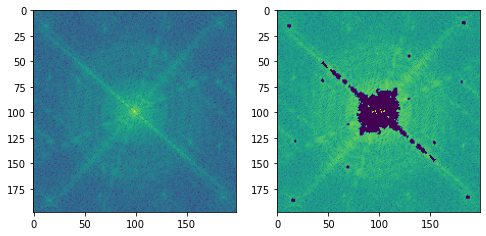

In [65]:
fig, ax_arr = plt.subplots(figsize=(8,10), ncols=2)
ax_arr[0].imshow(np.log(fft_magn))
fft_magn[dst>1e-11*dst.max()]= 1
ax_arr[1].imshow(np.log(fft_magn))

In [148]:
def fft_radius(fft):
    shape = fft.shape
    indices = np.dstack(np.mgrid[:shape[0],:shape[1]]) - [(shape[0] - 1)/2, (shape[1] - 1)//2]
    return np.ceil(np.linalg.norm(indices, axis=2) / (np.abs(fft) + 1)).astype(int)

In [73]:
shape = ffts_gray[0].shape
print(shape)
indices = np.dstack(np.mgrid[:shape[0],:shape[1]]) - [(shape[0] - 1)/2, (shape[1] - 1)//2]
np.ceil(np.linalg.norm(np.abs(indices), axis=2) / (np.abs(ffts_gray[0]) + 1))

(241, 209)


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
np.linalg.norm(indices, axis=2) / (np.abs(fft) + 1)

In [54]:
radius = fft_radius(ffts_gray[2])

In [55]:
radius.dtype

dtype('int64')

In [56]:
V = np.bincount(radius.reshape(radius.shape[0] * radius.shape[1]))

In [57]:
V

array([    0, 39318,    70,     4,     6,     0,     0,     0,     1,
           2,     1])

In [15]:
def compute_radius(V):
    s = V[0]
    r = 0
    again = True
    while again:
        i = 1
        again = False
        breakpoint()
        for v in V[1:]:
            cond = s > v
            s += v * int(cond)
            r += cond
            again = again or (s < v)
    return r, s

In [16]:
compute_radius(V)

KeyboardInterrupt: 

In [57]:
np.abs(ffts_gray[0])

array([[3375.06867686, 2130.80076025, 3465.49253147, ..., 2364.16176759,
        5421.41638209, 5067.14189303],
       [2369.06547484, 1695.69402431, 4716.06889889, ..., 2016.92797973,
        7167.97353975, 3030.6987454 ],
       [2713.92243389, 1184.88879819, 4043.30285606, ...,  943.19253569,
        3696.97996709, 1450.23764479],
       ...,
       [1450.23764479, 3696.97996709,  943.19253569, ..., 4043.30285606,
        1184.88879819, 2713.92243389],
       [3030.6987454 , 7167.97353975, 2016.92797973, ..., 4716.06889889,
        1695.69402431, 2369.06547484],
       [5067.14189303, 5421.41638209, 2364.16176759, ..., 3465.49253147,
        2130.80076025, 3375.06867686]])

In [61]:
shape = imgs_gray[1].shape
indices = np.dstack(np.mgrid[:shape[0],:shape[1]]) - [(shape[0] - 1)/2, (shape[1] - 1)//2]

In [62]:
shape

(196, 214)

In [64]:
np.ceil(indices)

array([[[ -97., -106.],
        [ -97., -105.],
        [ -97., -104.],
        ...,
        [ -97.,  105.],
        [ -97.,  106.],
        [ -97.,  107.]],

       [[ -96., -106.],
        [ -96., -105.],
        [ -96., -104.],
        ...,
        [ -96.,  105.],
        [ -96.,  106.],
        [ -96.,  107.]],

       [[ -95., -106.],
        [ -95., -105.],
        [ -95., -104.],
        ...,
        [ -95.,  105.],
        [ -95.,  106.],
        [ -95.,  107.]],

       ...,

       [[  96., -106.],
        [  96., -105.],
        [  96., -104.],
        ...,
        [  96.,  105.],
        [  96.,  106.],
        [  96.,  107.]],

       [[  97., -106.],
        [  97., -105.],
        [  97., -104.],
        ...,
        [  97.,  105.],
        [  97.,  106.],
        [  97.,  107.]],

       [[  98., -106.],
        [  98., -105.],
        [  98., -104.],
        ...,
        [  98.,  105.],
        [  98.,  106.],
        [  98.,  107.]]])

In [53]:
norms = np.linalg.norm(indices, axis=2)

In [54]:
norms

array([[158.79546593, 158.14234095, 157.49285698, ..., 157.49285698,
        158.14234095, 158.79546593],
       [158.04113389, 157.38487856, 156.73225577, ..., 156.73225577,
        157.38487856, 158.04113389],
       [157.28954193, 156.63013759, 155.97435687, ..., 155.97435687,
        156.63013759, 157.28954193],
       ...,
       [157.28954193, 156.63013759, 155.97435687, ..., 155.97435687,
        156.63013759, 157.28954193],
       [158.04113389, 157.38487856, 156.73225577, ..., 156.73225577,
        157.38487856, 158.04113389],
       [158.79546593, 158.14234095, 157.49285698, ..., 157.49285698,
        158.14234095, 158.79546593]])

In [99]:
def naive_fft(a):
    tmp_fft = np.vstack([np.fft.fft(a[i, :]) for i in range(a.shape[0])])
    return np.hstack([np.fft.fft(tmp_fft[:, i]).reshape(a.shape[0], 1) for i in range(a.shape[1])])

In [100]:
naive_fft_result = naive_fft(img_gray)
naive_fft_result = np.fft.fftshift(naive_fft_result)

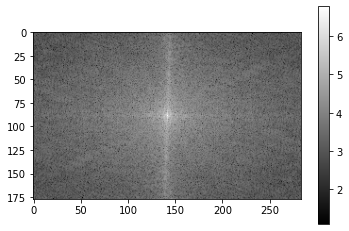

In [102]:
plt.imshow(np.log10(np.abs(naive_fft_result)), cmap='gray')
plt.colorbar()

In [109]:
naive_fft_result = naive_fft(img_gray)
recomposed = np.fft.ifft2(naive_fft_result)

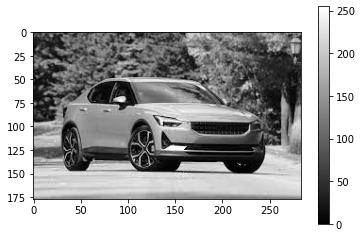

In [115]:
plt.imshow(recomposed.real, cmap='gray')
plt.colorbar()